## Detalls de rpart

In [16]:
library(MASS)
data(synth.tr)
data(synth.te)
str(synth.tr)

synth.tr$yc<-factor(synth.tr$yc) #Fem el factor de y, si no el rpart hace regresion por que piensa que es numerico
synth.te$yc<-factor(synth.te$yc)

'data.frame':	250 obs. of  3 variables:
 $ xs: num  0.051 -0.748 -0.773 0.218 0.373 ...
 $ ys: num  0.161 0.089 0.263 0.127 0.497 ...
 $ yc: int  0 0 0 0 0 0 0 0 0 0 ...


In [17]:
require(rpart)
source("prob.err.r")

synth.rpart.1<-rpart(yc~xs+ys,data=synth.tr)

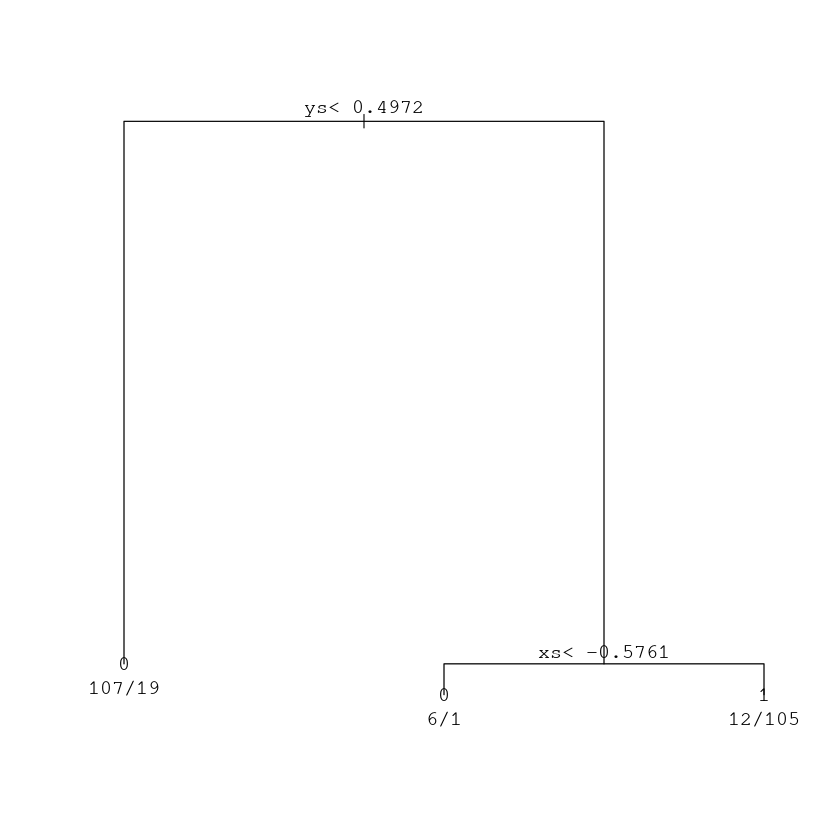

In [18]:
plot(synth.rpart.1)
text(synth.rpart.1,use.n=TRUE,xpd=2)

Matirz de confusion

In [20]:
synth.rpart.1.pred<-predict(synth.rpart.1,synth.te,type="class")
synth.rpart.1.conf<-table(True = synth.te$yc,Pred=synth.rpart.1.pred)
synth.rpart.1.conf

    Pred
True   0   1
   0 469  31
   1  72 428

Probabilidad de error

In [21]:
prob.err(synth.rpart.1.conf)

[1] 10.3

Parametros del rpar

In [23]:
help(rpart.control)

Ejemplo de cambio de los parametros:

*minsplit* Minimo numero de observaciones en cada nodo
*cp* Todo split que no mejore en cp el resultado de la classificacion sera ignorado

    Pred
True   0   1
   0 449  51
   1  50 450

[1] 10.1

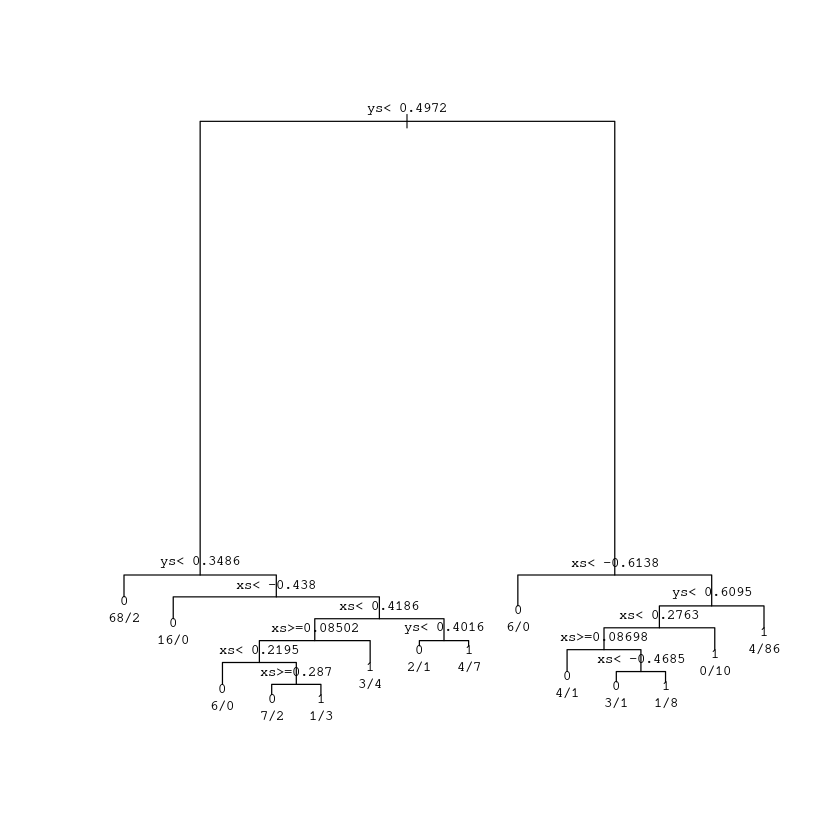

In [25]:
control.parms<-rpart.control(minsplit = 10,cp=0.005)
synth.rpart.2<-
rpart(yc~xs+ys,data=synth.tr,control=control.parms)
plot(synth.rpart.2)
text(synth.rpart.2,use.n=TRUE,xpd=2,cex=0.7)

synth.rpart.2.pred<-
predict(synth.rpart.2,synth.te,type="class")
synth.rpart.2.conf<-table(True = synth.te$yc,
Pred=synth.rpart.2.pred)
synth.rpart.2.conf

prob.err(synth.rpart.2.conf)

In [27]:
require(rpart)
data(stagec)
str(stagec)

stagec1<-stagec[,-(1:2)]
stagec1$progstat <- factor(stagec$pgstat, levels=0:1, labels=c("No", "Prog"))

'data.frame':	146 obs. of  8 variables:
 $ pgtime : num  6.1 9.4 5.2 3.2 1.9 4.8 5.8 7.3 3.7 15.9 ...
 $ pgstat : int  0 0 1 1 1 0 0 0 1 0 ...
 $ age    : int  64 62 59 62 64 69 75 71 73 64 ...
 $ eet    : int  2 1 2 2 2 1 2 2 2 2 ...
 $ g2     : num  10.26 NA 9.99 3.57 22.56 ...
 $ grade  : int  2 3 3 2 4 3 2 3 3 3 ...
 $ gleason: int  4 8 7 4 8 7 NA 7 6 7 ...
 $ ploidy : Factor w/ 3 levels "diploid","tetraploid",..: 1 3 1 1 2 1 2 3 1 2 ...


In [28]:
sum(!complete.cases(stagec1))
stagec2<-stagec1[complete.cases(stagec1),]

[1] 12

In [35]:
nrow(stagec2)

[1] 134

n= 134 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 134 49 No (0.6343284 0.3656716)  
   2) grade< 2.5 56  8 No (0.8571429 0.1428571) *
   3) grade>=2.5 78 37 Prog (0.4743590 0.5256410)  
     6) g2< 13.2 35 14 No (0.6000000 0.4000000)  
      12) g2>=11.845 7  1 No (0.8571429 0.1428571) *
      13) g2< 11.845 28 13 No (0.5357143 0.4642857)  
        26) g2< 11.005 21  8 No (0.6190476 0.3809524) *
        27) g2>=11.005 7  2 Prog (0.2857143 0.7142857) *
     7) g2>=13.2 43 16 Prog (0.3720930 0.6279070)  
      14) g2>=17.91 21  8 No (0.6190476 0.3809524)  
        28) age>=62.5 14  4 No (0.7142857 0.2857143) *
        29) age< 62.5 7  3 Prog (0.4285714 0.5714286) *
      15) g2< 17.91 22  3 Prog (0.1363636 0.8636364) *


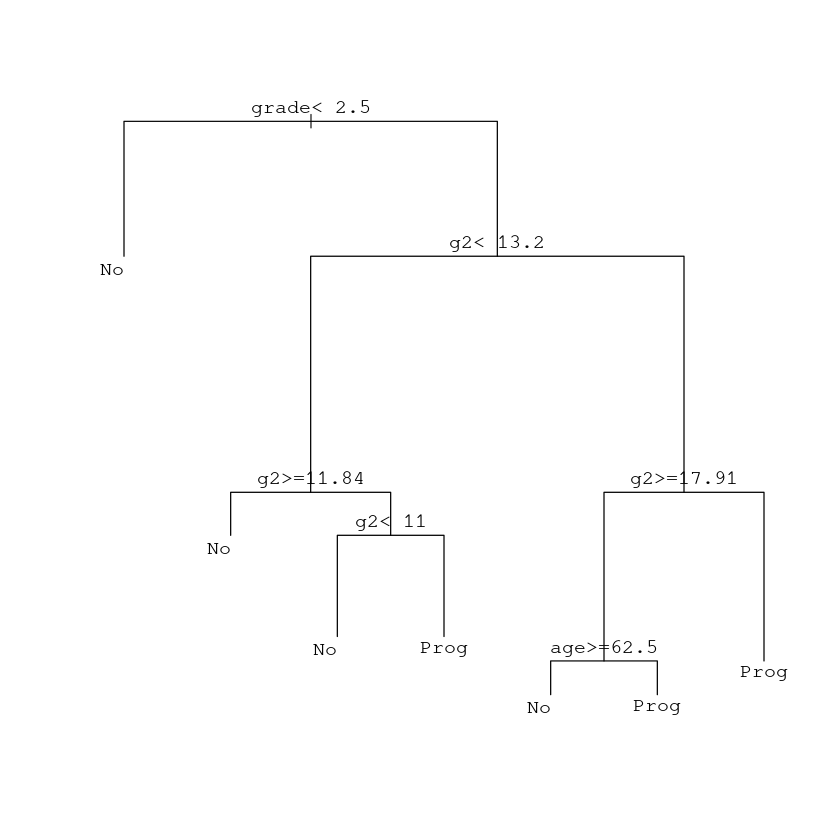

In [34]:

stagec2.rpart.1<-rpart(progstat ~ age + eet + g2 + grade + gleason + ploidy,data=stagec2, method="class")
print(stagec2.rpart.1)
plot(stagec2.rpart.1)
text(stagec2.rpart.1)

stagec2.rpart.1.pred<-
predict(stagec2.rpart.1,synth.te,type="class")
synth.rpart.2.conf<-table(True = synth.te$yc,
Pred=synth.rpart.2.pred)
synth.rpart.2.conf

prob.err(synth.rpart.2.conf)

n= 134 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 134 49 No (0.63432836 0.36567164)  
    2) grade< 2.5 56  8 No (0.85714286 0.14285714)  
      4) g2< 13.19 37  2 No (0.94594595 0.05405405) *
      5) g2>=13.19 19  6 No (0.68421053 0.31578947)  
       10) g2>=14.33 15  3 No (0.80000000 0.20000000)  
         20) g2>=20.14 5  0 No (1.00000000 0.00000000) *
         21) g2< 20.14 10  3 No (0.70000000 0.30000000)  
           42) g2< 16.925 7  1 No (0.85714286 0.14285714) *
           43) g2>=16.925 3  1 Prog (0.33333333 0.66666667) *
       11) g2< 14.33 4  1 Prog (0.25000000 0.75000000) *
    3) grade>=2.5 78 37 Prog (0.47435897 0.52564103)  
      6) grade< 3.5 73 36 No (0.50684932 0.49315068)  
       12) ploidy=diploid 27  9 No (0.66666667 0.33333333)  
         24) g2>=11.95 4  0 No (1.00000000 0.00000000) *
         25) g2< 11.95 23  9 No (0.60869565 0.39130435)  
           50) age< 69.5 20  6 No (0.70000000 0.30000000)  
            100) g2<

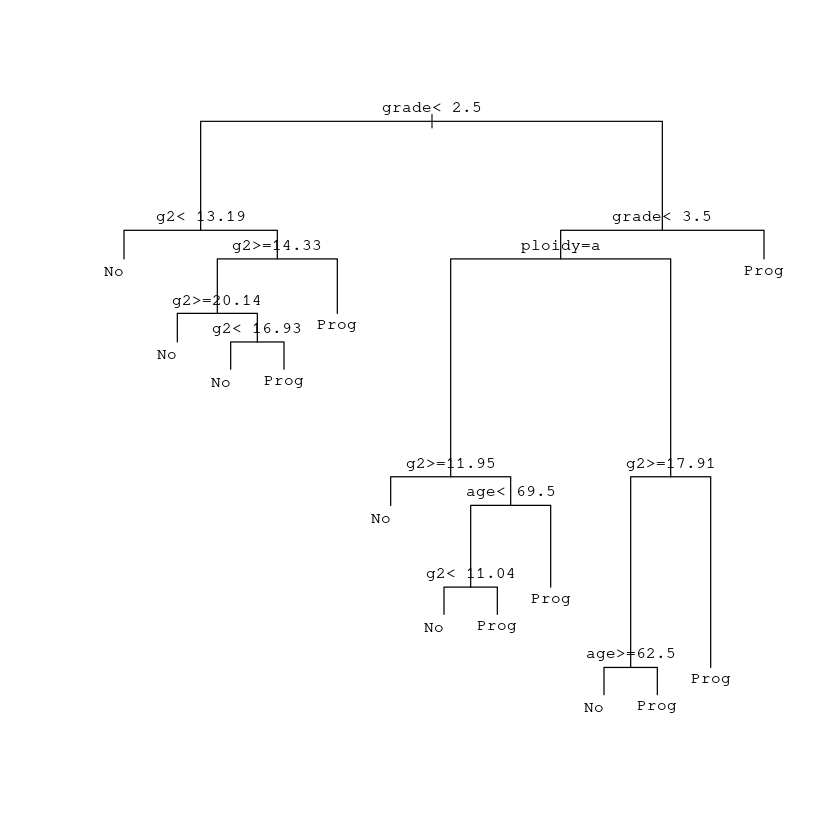

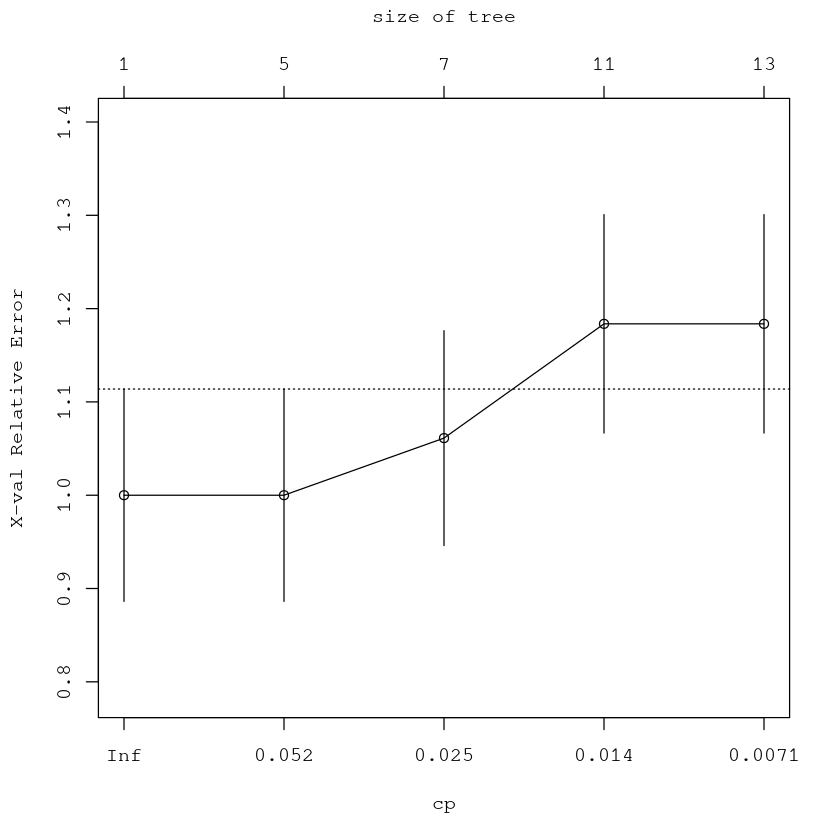

In [36]:
control.parms<-rpart.control(minsplit = 10, cp=0.005)
stagec2.rpart.2<-rpart(progstat ~ age + eet + g2 + grade + gleason + ploidy,data=stagec2, 
			method="class", control=control.parms)
print(stagec2.rpart.2)
plot(stagec2.rpart.2)
text(stagec2.rpart.2,cex=0.8)

printcp(stagec2.rpart.2)
plotcp(stagec2.rpart.2)

## Poda de un arbre

n= 134 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 134 49 No (0.6343284 0.3656716)  
   2) grade< 2.5 56  8 No (0.8571429 0.1428571) *
   3) grade>=2.5 78 37 Prog (0.4743590 0.5256410)  
     6) grade< 3.5 73 36 No (0.5068493 0.4931507)  
      12) ploidy=diploid 27  9 No (0.6666667 0.3333333) *
      13) ploidy=tetraploid,aneuploid 46 19 Prog (0.4130435 0.5869565)  
        26) g2>=17.91 19  6 No (0.6842105 0.3157895) *
        27) g2< 17.91 27  6 Prog (0.2222222 0.7777778) *
     7) grade>=3.5 5  0 Prog (0.0000000 1.0000000) *


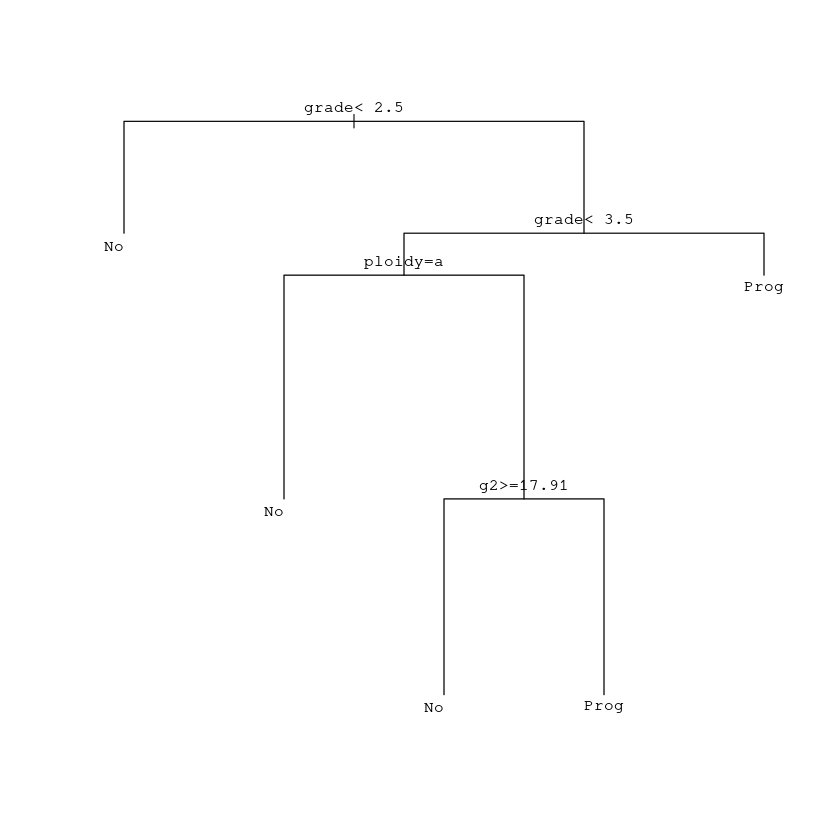

In [38]:
stagec2.rpart.3<-prune(stagec2.rpart.2,cp=0.052)#criterio de poda del arbol
print(stagec2.rpart.3)
plot(stagec2.rpart.3)
text(stagec2.rpart.3,cex=0.8)
